In [56]:
import sklearn
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np


train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

train['date'] = train['date'].apply(lambda x : str(x[:6]))
test['date'] = test['date'].apply(lambda x : str(x[:6]))
train.drop("id", inplace=True, axis=1)
test_id = test['id']
test.drop("id", inplace=True, axis=1)

# Feature engineering
[O] 결측치  
[O] 공선성  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train)

<Axes: >

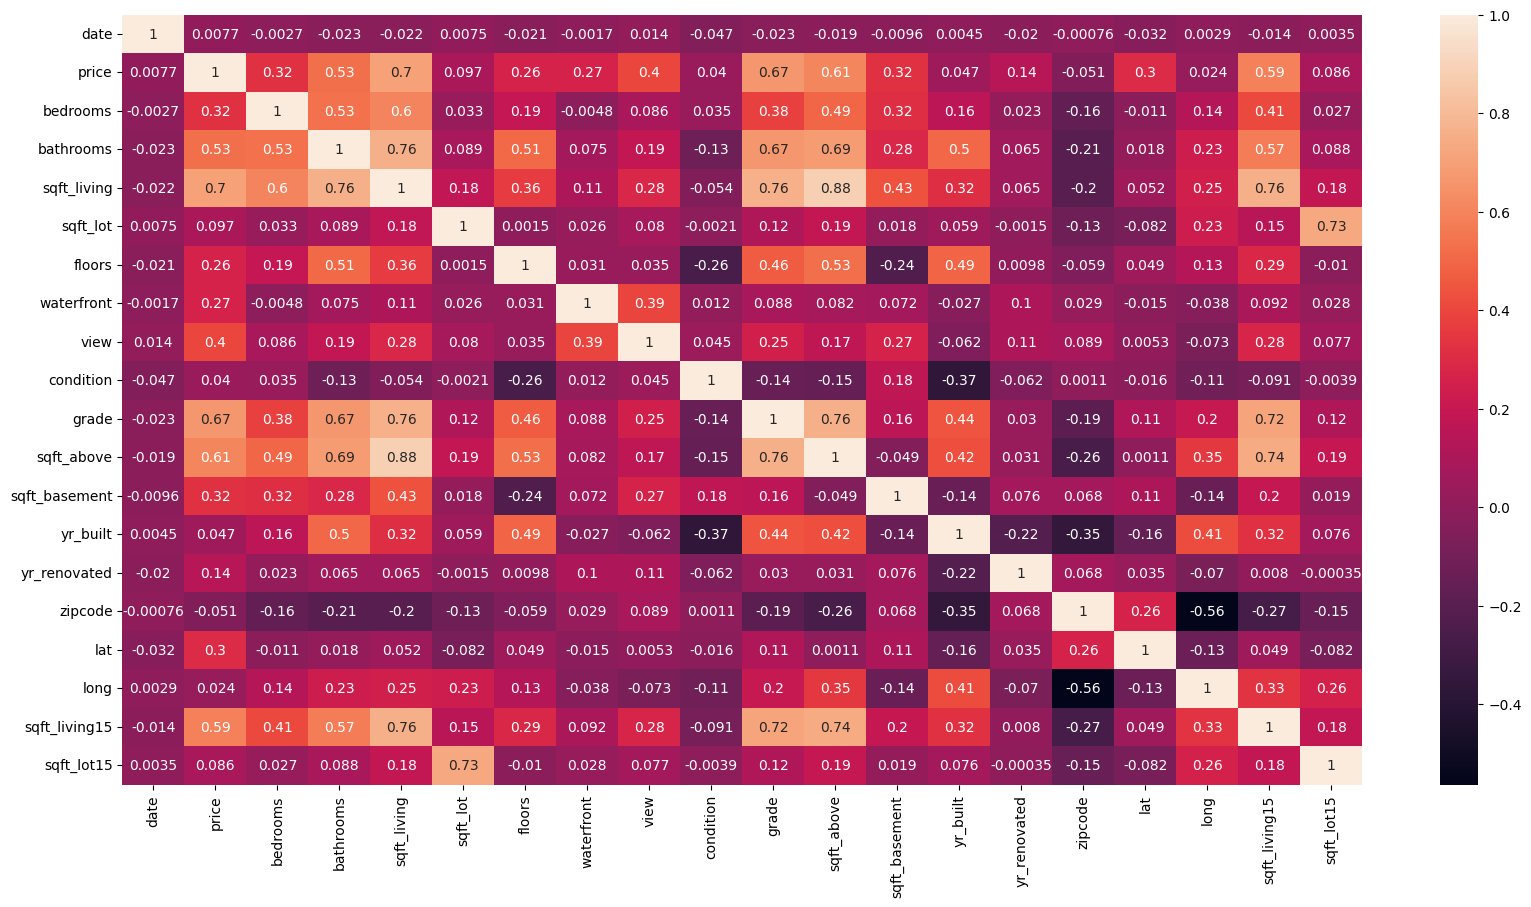

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train.corr(), annot=True)

## 중복치

In [ ]:
display(train[train.duplicated()])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## 이상치
제거 효과 없음

In [18]:
def outlier_iqr(df, col, scale=1.8):
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) 
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * scale)
    upper_bound = quartile_3 + (iqr * scale)

    return df.loc[(lower_bound > df[col]) | (upper_bound < df[col])]


numeric_df = train.select_dtypes("number")
for column in numeric_df.columns:
    index = outlier_iqr(numeric_df, column).index
    train.drop(index, axis=0)


display(train)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,201503,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,201405,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,201502,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


## 정규화

효과 없음

In [50]:
from sklearn.preprocessing import MinMaxScaler


min_max_scaler = MinMaxScaler()

columns = numeric_df.loc[:, numeric_df.columns != "price"].columns
train[columns] = min_max_scaler.fit_transform(train[columns])
display(train)

columns = test.select_dtypes("number").columns
test[numeric_columns] = min_max_scaler.transform(test[numeric_columns])
display(copy)



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,221900.0,0.3,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.0,0.893939,0.571498,0.217608,0.161934,0.005742
1,201502,180000.0,0.2,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.0,0.136364,0.936143,0.237542,0.399415,0.008513
2,201502,510000.0,0.3,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.0,0.368687,0.741354,0.393688,0.241094,0.007871
3,201406,257500.0,0.3,0.28125,0.107547,0.003816,0.4,0.0,0.0,0.5,0.500000,0.156250,0.000000,0.826087,0.0,0.010101,0.247386,0.159468,0.316469,0.007085
4,201501,291850.0,0.3,0.18750,0.058113,0.005567,0.0,0.0,0.0,0.5,0.500000,0.084430,0.000000,0.547826,0.0,0.994949,0.407914,0.169435,0.215281,0.010407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,610685.0,0.4,0.31250,0.168302,0.003333,0.4,0.0,0.0,0.5,0.666667,0.244518,0.000000,0.991304,0.0,0.277778,0.575519,0.292359,0.364997,0.006171
15031,201503,1007500.0,0.4,0.43750,0.243019,0.004046,0.4,0.0,0.0,0.5,0.666667,0.253289,0.220339,0.947826,0.0,0.681818,0.639858,0.100498,0.284116,0.006374
15032,201405,360000.0,0.3,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.0,0.515152,0.874055,0.143688,0.194631,0.000986
15033,201502,400000.0,0.4,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.0,0.732323,0.570693,0.130399,0.246257,0.007523


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201412,0.3,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.096852,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
1,201412,0.4,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.220339,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
2,201405,0.4,0.56250,0.387170,0.061429,0.0,0.0,0.0,0.5,0.833333,0.394737,0.370460,0.878261,0.000000,0.262626,0.804568,0.426910,0.750473,0.116339
3,201504,0.3,0.12500,0.112453,0.004210,0.0,0.0,0.0,0.5,0.500000,0.083333,0.176755,0.521739,0.000000,0.732323,0.573267,0.151163,0.237653,0.008572
4,201503,0.3,0.31250,0.120755,0.003659,0.4,0.0,0.0,0.5,0.500000,0.175439,0.000000,0.895652,0.000000,0.186869,0.341805,0.405316,0.342626,0.007948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,201406,0.3,0.21875,0.091321,0.006935,0.0,0.0,0.0,0.5,0.416667,0.132675,0.000000,0.991304,0.000000,0.045455,0.247065,0.429402,0.158493,0.012236
6464,201501,0.3,0.25000,0.090566,0.000367,0.8,0.0,0.0,0.5,0.583333,0.131579,0.000000,0.991304,0.000000,0.722222,0.665916,0.191860,0.172260,0.000665
6465,201502,0.3,0.31250,0.076981,0.000469,0.4,0.0,0.0,0.5,0.583333,0.097588,0.031477,0.939130,0.000000,0.580808,0.677819,0.091362,0.160213,0.000705
6466,201406,0.2,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558


In [57]:
x = train.loc[:, train.columns!="price"].values
y = train['price'].values
x_test = test.loc[:, test.columns!="price"].values

# 최적의 조합 찾기

In [115]:
from sklearn.model_selection import GridSearchCV



def GridSearch(model, x, y, param_grid, verbose=3, n_jobs=16):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring="r2", \
                              cv=10, verbose=verbose, n_jobs=n_jobs)
    # 모델 fitting
    grid_model.fit(x, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['mean'] = score
    results['score'] = model.score(x, y)

    return results

In [116]:
param_grids = [
    {
        "max_depth": [-1, 10, 50],
        "learning_rate": [0.001, 0.1],
        "n_estimators": [50, 100],
        "num_leaves": [31, 63],
        "boosting_type": ["gbdt"]
    }
]

for model,param_grid in zip([lightgbm], param_grids):
    print(GridSearch(model, x, y, param_grid, verbose=1))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
   boosting_type  learning_rate  max_depth  n_estimators  num_leaves  \
0           gbdt          0.001         -1            50          31   
1           gbdt          0.001         -1            50          63   
2           gbdt          0.001         -1           100          31   
3           gbdt          0.001         -1           100          63   
4           gbdt          0.001         10            50          31   
5           gbdt          0.001         10            50          63   
6           gbdt          0.001         10           100          31   
7           gbdt          0.001         10           100          63   
8           gbdt          0.001         50            50          31   
9           gbdt          0.001         50            50          63   
10          gbdt          0.001         50           100          31   
11          gbdt          0.001         50           100          63   
1

# 앙상블

In [112]:
xgboost = XGBRegressor()
lightgbm = LGBMRegressor()
rdforest = RandomForestRegressor()

models = [xgboost, lightgbm, rdforest]

def AveragingBlending(models, x, y, x_test):
    y_preds = []
    for model in models :
        model.fit(x, y)
        print(model.score(x, y))
        y_preds.append(model.predict(x_test))
    
    predictions = np.column_stack(y_preds)

    return np.mean(predictions, axis=1)

y_pred = AveragingBlending(models, x, y, x_test)
print(y_pred.shape, x_test.shape)

-1
31
0.9797712608708449
0.9473488525779001
0.9823703068599389
(6468,) (6468, 19)


# 제출

In [99]:
import kaggle


result = pd.DataFrame({
    "id": test_id,
    "price": y_pred
})
result.to_csv("./submission.csv", index=False)
kaggle.api.competition_submit_cli(file_name="submission.csv", competition="2019-2nd-ml-month-with-kakr", message="dupe lightgbm parameter tuning")

100%|██████████| 153k/153k [00:02<00:00, 60.0kB/s] 


Successfully submitted to 2019 2nd ML month with KaKR

In [101]:
kaggle.api.competition_submissions_cli(competition="2019-2nd-ml-month-with-kakr")

fileName        date                 description                                       status    publicScore    privateScore   
--------------  -------------------  ------------------------------------------------  --------  -------------  -------------  
submission.csv  2023-07-12 02:51:47  dupe lightgbm parameter tuning                    complete  124820.74253   122052.33467   
submission.csv  2023-07-12 02:50:55  lightgbm parameter tuning                         complete  3604449.16233  3604725.33354  
submission.csv  2023-07-12 02:18:32  not remove date, no outlier removal, add min-max  complete  3604449.16233  3604725.33354  
submission.csv  2023-07-12 02:02:36  not remove date, add outlier removal              complete  116394.94973   117737.02969   
submission.csv  2023-07-12 02:00:40  after remove date                                 complete  116616.94872   117019.10166   
submission.csv  2023-07-12 01:59:28  Before remove date                                complete  115830.